In [1]:
from sklearn import datasets

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import Perceptron

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
import plot_utilities

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
iris = datasets.load_iris()
y = iris.target
X = iris.data[:, [2, 3]]

Uncomment the two cells below if you want to discard label 2 and keep only 0 and 1

In [10]:
# X_0 = X[y==0, :]
# X_1 = X[y==1, :]
# X = np.vstack((X_0, X_1))

In [11]:
# y_0 = y[y==0]
# y_1 = y[y==1]
# y = np.hstack((y_0, y_1))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

In [13]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [15]:
y_pred = ppn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [16]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [17]:
def get_test_idx(total_num_examples, test_set_size):
    return range(total_num_examples - test_set_size, total_num_examples)

In [18]:
plot_utilities.plot_decision_regions(X_combined_std, y_combined, ppn,
                                     test_idx=get_test_idx(y_combined.shape[0], y_test.shape[0]))

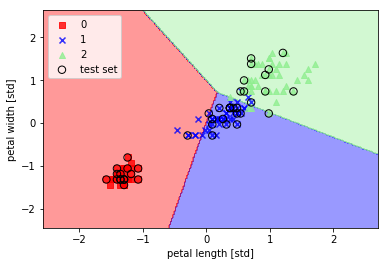

In [19]:
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.show()